In [191]:
from numpy import loadtxt
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.python.keras.layers import Dropout, BatchNormalization, Flatten
from keras import regularizers
from knn_imputer import *
from tensorflow.keras.layers import Dense
from sklearn import preprocessing 
% pylab inline

#train = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")
train = pd.read_csv("train_knn.csv")
test = pd.read_csv("test_knn.csv")
train.head()

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [192]:
np.isnan(train.loc[0, 'Alley'])

True

In [193]:
size(train.columns[train.isnull().sum() > 0])

16

In [194]:
size(test.columns[test.isnull().sum() > 0])

22

In [195]:
size(imputed_data1.columns[imputed_data1.isnull().sum() > 0])

0

In [196]:
#train.isnull().sum()

In [197]:
def my_knn(train, test):
    
    train_knn = train
    while size(train_knn.columns[train_knn.isnull().sum() > 0]) > 0 :
        knn_impute_data = train_knn
        col_list = knn_impute_data.columns
        knn_list = []

        for l in col_list:
            knn_list.append(knn_impute(knn_impute_data.loc[:,l],knn_impute_data.drop(columns = l, axis = 1), 
                                      k_neighbors = 5, aggregation_method="median",
                                      numeric_distance='gower',
                                      categorical_distance="gower", missing_neighbors_threshold = 0.8))

        imputed_train = pd.concat(knn_list, axis = 1, join = 'outer')
        train_knn = imputed_train
        
    for col in train_knn.columns:
        train.loc[:, col] = train_knn.loc[:, col]
    
    
    if (test is not None) :
        test_knn = test
        while size(test_knn.columns[test_knn.isnull().sum() > 0]) > 0 :
            knn_impute_data = test_knn
            col_list = knn_impute_data.columns
            knn_list = []

            for l in col_list:
                knn_list.append(knn_impute(knn_impute_data.loc[:,l],knn_impute_data.drop(columns = l, axis = 1), 
                                          k_neighbors = 5, aggregation_method="median",
                                          numeric_distance='gower',
                                          categorical_distance="gower", missing_neighbors_threshold = 0.8))

            imputed_test = pd.concat(knn_list, axis = 1, join = 'outer')
            test_knn = imputed_test

        for col in test_knn.columns:
            test.loc[:, col] = test_knn.loc[:, col]
    
    if (test is not None) :
        return (train, test)
    else:
        return train

In [198]:
#train, test = my_knn(train.copy(), test.copy())
#train.to_csv('train_knn.csv', index=0)
#test.to_csv('test_knn.csv', index=0)

In [199]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [200]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [201]:
y_label = train.loc[:, ['SalePrice']]
test_id = test.iloc[:, 0]
print(test_id[:5])

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64


In [202]:
def my_min_max_normalization(train, test):
    for i in range(len(train.iloc[0, :])):
        col = train.iloc[0, i]
        if (type(col) is numpy.int64 or type(col) is numpy.float64):
            train.iloc[:, i] = train.iloc[:, i] / train.iloc[:, i].max()
            
    if (test is not None) :
        for i in range(len(test.iloc[0, :])):
            col = test.iloc[0, i]
            if (type(col) is numpy.int64 or type(col) is numpy.float64):
                test.iloc[:, i] = test.iloc[:, i] / test.iloc[:, i].max()
    
    if (test is not None) :
        return (train, test)
    else:
        return train

In [203]:
def my_std_normalization(train, test):
    for i in range(len(train.iloc[0, :])):
        col = train.iloc[0, i]

        if (type(col) is numpy.int64 or type(col) is numpy.float64):
            std = train.iloc[:, i].std()
            mean = train.iloc[:, i].mean()
            train.iloc[:, i] = (train.iloc[:, i] - mean) / std
            
    if (test is not None) :
        for i in range(len(test.iloc[0, :])):
            col = test.iloc[0, i]
            
            if (type(col) is numpy.int64 or type(col) is numpy.float64):
                std = test.iloc[:, i].std()
                mean = test.iloc[:, i].mean()
                test.iloc[:, i] = (test.iloc[:, i] - mean) / std
    
    if (test is not None) :
        return (train, test)
    else:
        return train
    

In [204]:
def my_one_hot_encoding(train, test, col_name, debug=False):
    col_value_unique = train.loc[:, col_name].sort_values(ascending=True).unique()
    mapping = {}
    i = 0
    
    #find unique value
    for item in range(col_value_unique.size):
        
        #if col_value_unique[item] is nan:
        #    print(col_value_unique[item])
        #    continue
        if col_value_unique[item] not in mapping:
            mapping[col_value_unique[item]] = i
            i += 1
            
    if (test is not None) :
        col_value_unique = test.loc[:, col_name].sort_values(ascending=True).unique()
        for item in range(col_value_unique.size):
            #if col_value_unique[item] is nan:
            #    print(col_value_unique[item])
            #    continue
            if col_value_unique[item] not in mapping:
                mapping[col_value_unique[item]] = i
                i += 1
           
    #original
    train_col_ori = train[col_name]
    if (test is not None) :
        test_col_ori = test[col_name]
    
    #label encoding
    train[col_name] = train[col_name].map(mapping)
    if (test is not None) :
        test[col_name] = test[col_name].map(mapping)

    #one-hot encoding
    train_one_hot = np.zeros((len(train), len(mapping)))
    train_one_hot[np.arange(len(train)), train[col_name]] = 1
    train_one_hot_df = pd.DataFrame(train_one_hot, columns=mapping)
    
    if (test is not None) :
        test_one_hot = np.zeros((len(test), len(mapping)))
        test_one_hot[np.arange(len(test)), test[col_name]] = 1
        test_one_hot_df = pd.DataFrame(test_one_hot, columns=mapping)
    
    if (debug == True):
        train_one_hot_df = pd.concat([train_col_ori, train_one_hot_df], axis=1)
        if (test is not None) :
            test_one_hot_df = pd.concat([test_col_ori, test_one_hot_df], axis=1)
    
    if (test is not None) :
        return (train_one_hot_df, test_one_hot_df)
    else:
        return train_one_hot_df

In [205]:
def my_boolean_encoding(train, test):
    boolean_mapping = {False:0, True:1}

    for i in range(len(train.iloc[0, :])):
        col = train.iloc[0, i]
        if (type(col) is numpy.bool_):
            train.iloc[:, i] = train.iloc[:, i].map(boolean_mapping)
            
    if (test is not None) :
        for i in range(len(test.iloc[0, :])):
            col = test.iloc[0, i]
            if (type(col) is numpy.bool_):
                test.iloc[:, i] = test.iloc[:, i].map(boolean_mapping)
    
    if (test is not None) :
        return (train, test)
    else:
        return train

In [206]:
#y_label_one_hot = my_one_hot_encoding(y_label.copy(), None, 'SalePrice')

if 'SalePrice' in train.columns:
    train = train.drop('SalePrice', axis=1)

if 'Id' in train.columns:
    train = train.drop('Id', axis=1)
    
if 'Id' in test.columns:
    test = test.drop('Id', axis=1)
    

#if 'appearedHour' in train.columns:
#    train = train.drop('appearedHour', axis=1)
#    test = test.drop('appearedHour', axis=1)
    
#if 'appearedMinute' in train.columns:
#    train = train.drop('appearedMinute', axis=1)
#    test = test.drop('appearedMinute', axis=1)
    
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [207]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [208]:
train, test = my_std_normalization(train, test)
train, test = my_min_max_normalization(train, test)


train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.023311,RL,-0.019981,-0.010095,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,-0.761158,0.084352,WD,Normal
1,-0.277209,RL,0.041711,-0.004478,Pave,NaN,Reg,Lvl,AllPub,FR2,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,-0.232811,-0.373471,WD,Normal
2,0.023311,RL,-0.007643,0.003581,Pave,NaN,IR1,Lvl,AllPub,Inside,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,0.471653,0.084352,WD,Normal
3,0.098441,RL,-0.040546,-0.004722,Pave,NaN,IR1,Lvl,AllPub,Corner,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,-0.761158,-0.831295,WD,Abnorml
4,0.023311,RL,0.058162,0.018284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,1.000000,0.084352,WD,Normal


In [209]:
train, test = my_boolean_encoding(train.copy(), test.copy())
train.head()
#train.to_csv("train_bool.csv", index=0)
#test.to_csv("test_bool.csv", index=0)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.023311,RL,-0.019981,-0.010095,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,-0.761158,0.084352,WD,Normal
1,-0.277209,RL,0.041711,-0.004478,Pave,NaN,Reg,Lvl,AllPub,FR2,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,-0.232811,-0.373471,WD,Normal
2,0.023311,RL,-0.007643,0.003581,Pave,NaN,IR1,Lvl,AllPub,Inside,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,0.471653,0.084352,WD,Normal
3,0.098441,RL,-0.040546,-0.004722,Pave,NaN,IR1,Lvl,AllPub,Corner,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,-0.761158,-0.831295,WD,Abnorml
4,0.023311,RL,0.058162,0.018284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,-0.032393,-0.003752,NaN,NaN,NaN,-0.002814,1.000000,0.084352,WD,Normal


In [210]:
train.loc[:, 'Alley'].sort_values(ascending=True).unique()

array(['Grvl', 'Pave', nan], dtype=object)

In [211]:
one_hot_list = ['Alley']


print(one_hot_list)
for col in train.columns:
    if col in one_hot_list:
        train_col_one_hot, test_col_one_hot = my_one_hot_encoding(train.copy(), test.copy(), col)
        train = pd.concat([train, train_col_one_hot.iloc[:, 1:]], axis=1)
        test = pd.concat([test, test_col_one_hot.iloc[:, 1:]], axis=1)
        train = train.drop(col, axis=1)
        test = test.drop(col, axis=1)
        
train.to_csv("train_housing.csv", index=0)
test.to_csv("test_housing.csv", index=0)
train.head()

['Alley']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Pave,nan
0,0.023311,RL,-0.019981,-0.010095,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,-0.002814,-0.761158,0.084352,WD,Normal,0.0,1.0
1,-0.277209,RL,0.041711,-0.004478,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,NaN,NaN,NaN,-0.002814,-0.232811,-0.373471,WD,Normal,0.0,1.0
2,0.023311,RL,-0.007643,0.003581,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,-0.002814,0.471653,0.084352,WD,Normal,0.0,1.0
3,0.098441,RL,-0.040546,-0.004722,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,NaN,NaN,NaN,-0.002814,-0.761158,-0.831295,WD,Abnorml,0.0,1.0
4,0.023311,RL,0.058162,0.018284,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,NaN,NaN,NaN,-0.002814,1.000000,0.084352,WD,Normal,0.0,1.0


In [212]:
train.columns[train.isnull().sum() > 0]

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [213]:
size(train.columns[train.isnull().sum() > 0])

15

In [214]:
test.columns[train.isnull().sum() > 0]

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [215]:
one_hot_list = ['Alley']

#for col in train.columns:
for i in range(len(train.iloc[0, :])):
    col = train.iloc[0, i]
    if (type(col)) is str:
        one_hot_list.append(train.columns[i])

        
print(one_hot_list)
for col in train.columns:
    if col in one_hot_list:
        train_col_one_hot, test_col_one_hot = my_one_hot_encoding(train.copy(), test.copy(), col)
        train = pd.concat([train, train_col_one_hot.iloc[:, 1:]], axis=1)
        test = pd.concat([test, test_col_one_hot.iloc[:, 1:]], axis=1)
        train = train.drop(col, axis=1)
        test = test.drop(col, axis=1)
        
train.to_csv("train_housing.csv", index=0)
test.to_csv("test_housing.csv", index=0)
train.head()

['Alley', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,nan,AdjLand,Alloca,Family,Normal,Partial
0,0.023311,-0.019981,-0.010095,0.230904,-0.168,0.819272,0.721496,0.061868,0.050450,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.277209,0.041711,-0.004478,-0.025461,0.708,0.122177,-0.352736,-0.069096,0.102754,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.023311,-0.007643,0.003581,0.230904,-0.168,0.767635,0.681709,0.039150,0.008146,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.098441,-0.040546,-0.004722,0.230904,-0.168,-1.452740,-0.591454,-0.069096,-0.043774,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.023311,0.058162,0.018284,0.487270,-0.168,0.741817,0.602136,0.164769,0.040643,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [216]:
test.columns[test.isnull().sum() > 0]

Index(['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [217]:
train.columns[train.isnull().sum() > 0]

Index(['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [218]:
for col in test.columns[test.isnull().sum() > 0]:
    test = test.drop(col, axis=1)
    
for col in train.columns[train.isnull().sum() > 0]:
    train = train.drop(col, axis=1)

In [219]:
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,nan,AdjLand,Alloca,Family,Normal,Partial
0,-0.281842,0.085871,0.038538,-0.275127,0.129475,-0.268043,-0.860485,-0.084185,0.008077,0.062044,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.281842,0.093488,0.095078,-0.020101,0.129475,-0.345678,-0.974392,0.006584,0.135498,-0.035688,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.019768,0.040164,0.085737,-0.275127,-0.160700,0.663580,0.544371,-0.084185,0.098532,-0.035688,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.019768,0.070635,0.003395,-0.020101,0.129475,0.689459,0.544371,-0.067376,0.045603,-0.035688,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.472183,-0.195986,-0.102909,0.489949,-0.160700,0.534188,0.316556,-0.084185,-0.049332,-0.035688,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [220]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,nan,AdjLand,Alloca,Family,Normal,Partial
0,0.023311,-0.019981,-0.010095,0.230904,-0.168,0.819272,0.721496,0.061868,0.050450,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.277209,0.041711,-0.004478,-0.025461,0.708,0.122177,-0.352736,-0.069096,0.102754,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.023311,-0.007643,0.003581,0.230904,-0.168,0.767635,0.681709,0.039150,0.008146,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.098441,-0.040546,-0.004722,0.230904,-0.168,-1.452740,-0.591454,-0.069096,-0.043774,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.023311,0.058162,0.018284,0.487270,-0.168,0.741817,0.602136,0.164769,0.040643,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [221]:
train.to_csv("train_housing.csv", index=0)
test.to_csv("test_housing.csv", index=0)

In [222]:
x_train, x_valid, y_train, y_valid = train_test_split(train, y_label, random_state = 7, test_size = 0.13)

In [223]:
y_valid.head()

,SalePrice
606,152000
1210,189000
492,172785
410,60000
396,123000


In [224]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(x_train.iloc[0,:].size)
print(y_train.iloc[0,:].size)

(1270, 252)
(190, 252)
(1270, 1)
(190, 1)
252
1


In [225]:
x_valid.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,nan,AdjLand,Alloca,Family,Normal,Partial
606,-0.277209,0.049937,0.009511,-0.281826,-0.168,0.638544,0.442991,-0.069096,0.055450,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1210,0.023311,0.000583,0.003425,-0.025461,-0.168,0.535270,0.283846,-0.069096,-0.085309,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
492,0.023311,0.144532,0.024721,-0.025461,-0.168,0.896727,0.840855,-0.069096,-0.085309,-0.03261,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
410,-0.277209,-0.007643,-0.004620,-0.281826,-0.752,-0.342552,-1.068890,-0.069096,-0.085309,-0.03261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,-0.277209,-0.040546,-0.016201,-0.281826,-0.168,0.018904,-0.511881,-0.069096,0.064103,-0.03261,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [226]:
y_train.head()

,SalePrice
985,125000
547,129500
1078,155900
1457,266500
128,155000


In [227]:
#y_train.iloc[:,-1].values.shape

In [228]:
#x_train.head()

In [235]:
input_shape = x_train.iloc[0,:].size
output_shape = y_train.iloc[0,:].size

model = tf.keras.Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(Dense(1, activation="linear"))

batch_size = 32
epochs = 300
lr = 0.01
train_ratio = 0.9

early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=2)


In [238]:
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(
              loss="mean_absolute_percentage_error", optimizer=opt
            )


In [239]:
model_history = model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_valid, y_valid),
                          shuffle=False, callbacks=[early_stopping]
                         )

Train on 1270 samples, validate on 190 samples
Epoch 1/300
1270/1270 [==============================] - 0s 302us/step - loss: 99.9968 - val_loss: 99.9899
Epoch 2/300
1270/1270 [==============================] - 0s 81us/step - loss: 99.9647 - val_loss: 99.9284
Epoch 3/300
1270/1270 [==============================] - 0s 83us/step - loss: 99.8367 - val_loss: 99.7320
Epoch 4/300
1270/1270 [==============================] - 0s 83us/step - loss: 99.5091 - val_loss: 99.2988
Epoch 5/300
1270/1270 [==============================] - 0s 81us/step - loss: 98.8731 - val_loss: 98.5299
Epoch 6/300
1270/1270 [==============================] - 0s 84us/step - loss: 97.8203 - val_loss: 97.3210
Epoch 7/300
1270/1270 [==============================] - 0s 80us/step - loss: 96.2325 - val_loss: 95.5618
Epoch 8/300
1270/1270 [==============================] - 0s 82us/step - loss: 93.9945 - val_loss: 93.1491
Epoch 9/300
1270/1270 [==============================] - 0s 80us/step - loss: 91.0012 - val_loss: 89.995

In [232]:
train_loss = model_history.history['loss']
train_acc = model_history.history['acc']
valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_acc']
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(train_acc, 'b', label='train')
plt.plot(valid_acc, 'r', label='valid')
plt.legend(loc=4)
plt.title("Accuracy")
plt.show()

KeyError: 'acc'

In [252]:
y_predict = model.predict_classes(x_valid)
y_valid_label = np.argmax(y_valid.values, axis=1)
print('Accuracy in testing data:', accuracy_score(y_valid_label, y_predict))

Accuracy in testing data: 0.0


In [889]:
#tf.global_variables()

In [249]:
# save model
#model.save('my_model.h5')

# load model
#another_model = tf.keras.models.load_model('my_model.h5')

In [250]:
y_predict = model.predict_classes(test)

In [251]:
data = list(zip(test_id, y_predict))
df = pd.DataFrame(data, columns=['ID', 'SalePrice'])
df.to_csv("20190824_at082022_submission.csv", index=0)
df.head()

,ID,SalePrice
0,1461,[1]
1,1462,[1]
2,1463,[1]
3,1464,[1]
4,1465,[1]


In [246]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
y_label = train.loc[:, ['class']]
test_id = test.iloc[:, 0]
y_label_one_hot = my_one_hot_encoding(y_label.copy(), None, 'class')

if 'class' in train.columns:
    train = train.drop('class', axis=1)

if 'ID' in train.columns:
    train = train.drop('ID', axis=1)
    
if 'id' in test.columns:
    test = test.drop('id', axis=1)
    
train, test = my_min_max_normalization(train, test)
train, test = my_boolean_encoding(train.copy(), test.copy())

one_hot_list = ['appearedTimeOfDay', 'city', 'continent', 'weather', 'weatherIcon']

for col in train.columns:
    if col in one_hot_list:
        train_col_one_hot, test_col_one_hot = my_one_hot_encoding(train.copy(), test.copy(), col)
        train = pd.concat([train, train_col_one_hot.iloc[:, 1:]], axis=1)
        test = pd.concat([test, test_col_one_hot.iloc[:, 1:]], axis=1)
        train = train.drop(col, axis=1)
        test = test.drop(col, axis=1)

        
number = 30

for i in range(2, number):  #power of 1 is already there
    colname = 'windSpeed_%d'%i      #new var will be x_power
    train[colname] = train['windSpeed']**i

for i in range(2, number):  #power of 1 is already there
    colname = 'temperature_%d'%i      #new var will be x_power
    train[colname] = train['temperature']**i
    
for i in range(2, number):  #power of 1 is already there
    colname = 'pressure_%d'%i      #new var will be x_power
    train[colname] = train['pressure']**i

for i in range(2, number):  #power of 1 is already there
    colname = 'population_density_%d'%i      #new var will be x_power
    train[colname] = train['population_density']**i
    
for i in range(2, number):  #power of 1 is already there
    colname = 'appearedHour_%d'%i      #new var will be x_power
    train[colname] = train['appearedHour']**i
    
for i in range(2, number):  #power of 1 is already there
    colname = 'appearedMinute_%d'%i      #new var will be x_power
    train[colname] = train['appearedMinute']**i
    

    
for i in range(2, number):  #power of 1 is already there
    colname = 'windSpeed_%d'%i      #new var will be x_power
    test[colname] = test['windSpeed']**i

for i in range(2, number):  #power of 1 is already there
    colname = 'temperature_%d'%i      #new var will be x_power
    test[colname] = test['temperature']**i
    
for i in range(2, number):  #power of 1 is already there
    colname = 'pressure_%d'%i      #new var will be x_power
    test[colname] = test['pressure']**i
    
for i in range(2, number):  #power of 1 is already there
    colname = 'population_density_%d'%i      #new var will be x_power
    test[colname] = test['population_density']**i
    
for i in range(2, number):  #power of 1 is already there
    colname = 'appearedHour_%d'%i      #new var will be x_power
    test[colname] = test['appearedHour']**i
    
for i in range(2, number):  #power of 1 is already there
    colname = 'appearedMinute_%d'%i      #new var will be x_power
    test[colname] = test['appearedMinute']**i
            
        
x_train, x_valid, y_train, y_valid = train_test_split(train, y_label_one_hot, random_state = 32, test_size = 0.13, stratify=y_label)

In [248]:
another_model_history = another_model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_valid, y_valid),
                          shuffle=False, callbacks=[early_stopping]
                         )

Train on 6229 samples, validate on 931 samples
Epoch 1/200
6229/6229 [==============================] - 0s 67us/step - loss: 1.1937 - acc: 0.5197 - val_loss: 1.1355 - val_acc: 0.5693
Epoch 2/200
6229/6229 [==============================] - 0s 67us/step - loss: 1.1964 - acc: 0.5158 - val_loss: 1.1381 - val_acc: 0.5628
Epoch 3/200
6229/6229 [==============================] - 0s 68us/step - loss: 1.2014 - acc: 0.5185 - val_loss: 1.1373 - val_acc: 0.5714
Epoch 4/200
6229/6229 [==============================] - 0s 68us/step - loss: 1.1956 - acc: 0.5184 - val_loss: 1.1384 - val_acc: 0.5789
Epoch 5/200
6229/6229 [==============================] - 0s 67us/step - loss: 1.2029 - acc: 0.5152 - val_loss: 1.1374 - val_acc: 0.5714
Epoch 6/200
6229/6229 [==============================] - 0s 67us/step - loss: 1.1887 - acc: 0.5261 - val_loss: 1.1460 - val_acc: 0.5650
Epoch 7/200
6229/6229 [==============================] - 0s 67us/step - loss: 1.1870 - acc: 0.5240 - val_loss: 1.1376 - val_acc: 0.5736
E

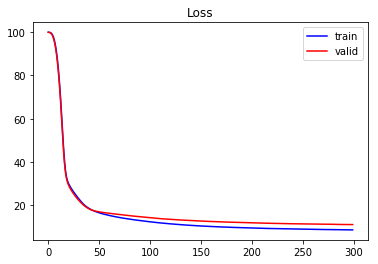

In [246]:
train_loss = model_history.history['loss']
#train_acc = model_history.history['acc']
valid_loss = model_history.history['val_loss']
#valid_acc = model_history.history['val_acc']
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

#plt.plot(train_acc, 'b', label='train')
#plt.plot(valid_acc, 'r', label='valid')
#plt.legend(loc=4)
#plt.title("Accuracy")
#plt.show()

In [248]:
y_predict = model.predict_classes(test)
data = list(zip(test_id, y_predict))
df = pd.DataFrame(data, columns=['ID', 'SalePrice'])
df.to_csv("20190824_at082022_submission.csv", index=0)
df.head()

,ID,SalePrice
0,1461,[1]
1,1462,[1]
2,1463,[1]
3,1464,[1]
4,1465,[1]
